In [1]:
import pandas as pd

In [2]:
pickle_example = pd.read_pickle("./train_val/D2_train.pkl")

In [3]:
pickle_action = pd.read_pickle("./action-net/ActionNet_test.pkl")

In [4]:
pickle_action[]

SyntaxError: invalid syntax (Temp/ipykernel_12408/2961311852.py, line 1)

In [5]:
pickle_example

,uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class
0,0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2
1,2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3
2,3,P01,P01_01,open fridge,00:00:12.77,00:00:13.99,766,839,open,2
3,4,P01,P01_01,take celery,00:00:15.25,00:00:16.40,915,983,take,0
4,5,P01,P01_01,take container,00:00:16.50,00:00:18.06,990,1083,take,0
...,...,...,...,...,...,...,...,...,...,...
2490,3990,P01,P01_19,put table cloth into cupboard,00:07:32.16,00:07:33.41,27129,27204,put,1
2491,3991,P01,P01_19,take lid,00:07:33.82,00:07:34.60,27229,27276,take,0
2492,3992,P01,P01_19,close container,00:07:34.70,00:07:43.38,27282,27802,close,3
2493,3993,P01,P01_19,open fridge,00:07:46.94,00:07:48.61,28016,28116,open,2


In [6]:
set(pickle_example["verb_class"])

{0, 1, 2, 3, 4, 5, 6, 7}

In [7]:
len(set(pickle_example["verb"]))

25

In [ ]:
pickle_example.columns

Index(['uid', 'participant_id', 'video_id', 'narration', 'start_timestamp',
       'stop_timestamp', 'start_frame', 'stop_frame', 'verb', 'verb_class'],
      dtype='object')

In [ ]:
i = 0
for tup in pickle_example.iterrows():
    print(tup[0])
    print(tup[1],"\n")
    if i == 1: break 
    i+=1

0
uid                          0
participant_id             P01
video_id                P01_01
narration            open door
start_timestamp    00:00:00.14
stop_timestamp     00:00:03.37
start_frame                  8
stop_frame                 202
verb                      open
verb_class                   2
Name: 0, dtype: object 

1
uid                          2
participant_id             P01
video_id                P01_01
narration           close door
start_timestamp    00:00:06.98
stop_timestamp     00:00:09.49
start_frame                418
stop_frame                 569
verb                     close
verb_class                   3
Name: 1, dtype: object 



In [ ]:
set(pickle_example["video_id"])

{'P01_01',
 'P01_02',
 'P01_03',
 'P01_04',
 'P01_05',
 'P01_06',
 'P01_07',
 'P01_08',
 'P01_09',
 'P01_10',
 'P01_16',
 'P01_17',
 'P01_18',
 'P01_19'}

In [ ]:
len(pickle_example["video_id"]), len(set(pickle_example["video_id"]))

(1543, 22)

In [ ]:
pickle_example["verb"][3]

'get'

In [ ]:
pickle_example["narration"][3]

'get moka'

In [ ]:
from omegaconf import OmegaConf

ModuleNotFoundError: No module named 'omegaconf'

In [ ]:
yaml_configs = OmegaConf.load("configs/default.yaml")

In [ ]:
yaml_configs

{'action': '???', 'name': '???', 'modality': ['RGB'], 'total_batch': 128, 'batch_size': 32, 'gpus': None, 'wandb_name': None, 'resume_from': None, 'logname': None, 'models_dir': None, 'train': {'num_iter': 5000, 'lr_steps': 3000, 'eval_freq': 50, 'num_clips': 1, 'dense_sampling': {'RGB': True}, 'num_frames_per_clip': {'RGB': 16}}, 'test': {'num_clips': 5, 'dense_sampling': {'RGB': True}, 'num_frames_per_clip': {'RGB': 16}}, 'dataset': {'annotations_path': 'train_val', 'shift': '???', 'workers': 4, 'stride': 2, 'resolution': 224, 'RGB': {'data_path': '???', 'tmpl': 'img_{:010d}.jpg', 'features_name': 'test_feat_kinetics'}, 'Event': {'rgb4e': 6}}, 'models': {'RGB': {'model': 'Classifier', 'normalize': False, 'kwargs': {}, 'lr_steps': 3000, 'lr': 0.01, 'sgd_momentum': 0.9, 'weight_decay': 1e-07}}}

In [ ]:
import numpy as np
num_clip = 4
num_frames = 20
frames_per_clip = 5
intervals = np.int16(np.linspace(0, num_frames, num_clip+1))
frames = np.array([], dtype=np.int16)
for i, first in enumerate(intervals[0:-1]):
    last = intervals[i+1]
    frames = np.hstack([frames,np.int16(np.linspace(first, last-1, frames_per_clip))])
frames, len(frames) == frames_per_clip*num_clip


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int16),
 True)

In [ ]:
import numpy as np
import random as rd
num_clip = 4
num_frames = 40
frames_per_part = (frames_per_clip-1)//2
frames = np.array([],dtype=np.int16)

video = np.arange(0,num_frames+1)

stride = 3
centrals = np.random.choice(video[frames_per_part*stride+1:-frames_per_part*stride-1], num_clip,replace= False)
centrals = np.sort(centrals)
for i in centrals:
   frames = np.append(frames,np.concatenate([video[i-stride*frames_per_part:i:stride],[i],video[i+stride:i+stride+stride*frames_per_part:stride]]))


In [ ]:
frames


array([ 7, 10, 13, 16, 19, 12, 15, 18, 21, 24, 15, 18, 21, 24, 27, 22, 25,
       28, 31, 34])

In [4]:
import models as model_list

getattr(model_list, "Classifier")(1024, 8)

Classifier()

# actionNet

### labels and timestamps

In [1]:
import h5py, numpy as np

path = "2022-06-14_16-38-43_streamLog_actionNet-wearables_S04.hdf5"
h5_file = h5py.File(path)

device_name = 'experiment-activities'
stream_name = 'activities'

# Get the timestamped label data.
# As described in the HDF5 metadata, each row has entries for ['Activity', 'Start/Stop', 'Valid', 'Notes'].
activity_datas = h5_file[device_name][stream_name]['data']
activity_times_s = h5_file[device_name][stream_name]['time_s']
activity_times_s = np.squeeze(np.array(activity_times_s))  # squeeze (optional) converts from a list of single-element lists to a 1D list
# Convert to strings for convenience.
activity_datas = [[x.decode('utf-8') for x in datas] for datas in activity_datas]

# Combine start/stop rows to single activity entries with start/stop times.
#   Each row is either the start or stop of the label.
#   The notes and ratings fields are the same for the start/stop rows of the label, so only need to check one.
exclude_bad_labels = True # some activities may have been marked as 'Bad' or 'Maybe' by the experimenter; submitted notes with the activity typically give more information
activities_labels = []
activities_start_times_s = []
activities_end_times_s = []
activities_ratings = []
activities_notes = []
for (row_index, time_s) in enumerate(activity_times_s):
  label    = activity_datas[row_index][0]
  is_start = activity_datas[row_index][1] == 'Start'
  is_stop  = activity_datas[row_index][1] == 'Stop'
  rating   = activity_datas[row_index][2]
  notes    = activity_datas[row_index][3]
  if exclude_bad_labels and rating in ['Bad', 'Maybe']:
    continue
  # Record the start of a new activity.
  if is_start:
    activities_labels.append(label)
    activities_start_times_s.append(time_s)
    activities_ratings.append(rating)
    activities_notes.append(notes)
  # Record the end of the previous activity.
  if is_stop:
    activities_end_times_s.append(time_s)

print('Activity Labels:')
print(activities_labels)
print()
print('Activity Start Times')
print(activities_start_times_s)
print()
print('Activity End Times')
print(activities_end_times_s)


Activity Labels:
['Get/replace items from refrigerator/cabinets/drawers', 'Peel a cucumber', 'Peel a cucumber', 'Peel a cucumber', 'Clear cutting board', 'Slice a cucumber', 'Slice a cucumber', 'Slice a cucumber', 'Clear cutting board', 'Get/replace items from refrigerator/cabinets/drawers', 'Peel a potato', 'Peel a potato', 'Peel a potato', 'Clear cutting board', 'Slice a potato', 'Slice a potato', 'Slice a potato', 'Clear cutting board', 'Get/replace items from refrigerator/cabinets/drawers', 'Slice bread', 'Slice bread', 'Slice bread', 'Clear cutting board', 'Get/replace items from refrigerator/cabinets/drawers', 'Spread almond butter on a bread slice', 'Spread almond butter on a bread slice', 'Spread almond butter on a bread slice', 'Spread jelly on a bread slice', 'Spread jelly on a bread slice', 'Spread jelly on a bread slice', 'Clear cutting board', 'Open/close a jar of almond butter', 'Open/close a jar of almond butter', 'Open/close a jar of almond butter', 'Get/replace items f

In [2]:
CALIBRATION_SHIFT = 14*60 + 21

In [41]:
from datetime import datetime

(datetime.utcfromtimestamp(max(activities_end_times_s)) - datetime.utcfromtimestamp(min(activities_start_times_s))).total_seconds()/60

42.09136083333333

In [44]:
datetime.utcfromtimestamp(min(activities_start_times_s))

datetime.datetime(2022, 6, 14, 20, 52, 54, 419056)

In [3]:
labels_dict = {}
i=0
for label in set(activities_labels):
    labels_dict[label] = i
    i+=1

In [14]:
VIDEO_FRAMERATE = 30

In [15]:
#TODO decide if we want to merge the same actions into one
from datetime import datetime
import pandas as pd
#"start_timestamp", "stop_timestamp"
records = []
shift = datetime.utcfromtimestamp(min(activities_start_times_s))
for i, label in enumerate(activities_labels) :
    #activities_end_times_s
    #start_timestamp = datetime.timestamp(datetime.utcfromtimestamp(activities_start_times_s[i]) - shift)
    #stop_timestamp = datetime.timestamp(datetime.utcfromtimestamp(activities_end_times_s[i]) - shift)
    start_frame = int((datetime.utcfromtimestamp(activities_start_times_s[i]) - shift).total_seconds() * VIDEO_FRAMERATE)
    stop_frame = int((datetime.utcfromtimestamp(activities_end_times_s[i]) - shift).total_seconds() * VIDEO_FRAMERATE)
    narration = label
    verb_class = labels_dict[label]
    records.append([start_frame,stop_frame, narration, verb_class])

records_pd = pd.DataFrame(records,columns=["start_frame", "stop_frame", "narration", "verb_class"])

NameError: name 'activities_start_times_s' is not defined

In [12]:
records_pd

,start_frame,stop_frame,narration,verb_class
0,0,76,Get/replace items from refrigerator/cabinets/d...,6
1,90,138,Peel a cucumber,18
2,156,192,Peel a cucumber,18
3,203,249,Peel a cucumber,18
4,264,306,Clear cutting board,12
5,316,365,Slice a cucumber,3
6,382,428,Slice a cucumber,3
7,440,479,Slice a cucumber,3
8,498,543,Clear cutting board,12
9,553,623,Get/replace items from refrigerator/cabinets/d...,6


In [13]:
set(activities_labels)

{'Clean a pan with a sponge',
 'Clean a pan with a towel',
 'Clean a plate with a sponge',
 'Clean a plate with a towel',
 'Clear cutting board',
 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils',
 'Get/replace items from refrigerator/cabinets/drawers',
 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils',
 'Open/close a jar of almond butter',
 'Peel a cucumber',
 'Peel a potato',
 'Pour water from a pitcher into a glass',
 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils',
 'Slice a cucumber',
 'Slice a potato',
 'Slice bread',
 'Spread almond butter on a bread slice',
 'Spread jelly on a bread slice',
 'Stack on table: 3 each large/small plates, bowls',
 'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'}

In [14]:
list(h5_file["experiment-activities"]['activities'])

['data', 'time_s', 'time_str']

# Their classifier

In [15]:
import h5py, numpy as np

path = "recording_timestamps.hdf5"
h5_file = h5py.File(path)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'recording_timestamps.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
h5_file.keys()

<KeysViewHDF5 ['experiment-notes', 'overhead', 'sink']>

In [ ]:
h5_file["overhead"]["chunk_timestamp"].keys()

<KeysViewHDF5 ['data', 'time_s', 'time_str']>

In [ ]:
pd.DataFrame(h5_file["overhead"]["chunk_timestamp"]["time_str"])

,0
0,b'2022-06-14 16:36:57.348811'
1,b'2022-06-14 16:36:57.348962'
2,b'2022-06-14 16:36:57.391858'
3,b'2022-06-14 16:36:57.476840'
4,b'2022-06-14 16:36:57.476921'
...,...
88139,b'2022-06-14 17:39:43.501784'
88140,b'2022-06-14 17:39:43.501878'
88141,b'2022-06-14 17:39:43.544848'
88142,b'2022-06-14 17:39:43.629788'


In [53]:
action_net = pd.read_pickle("./action-net/ActionNet_train.pkl")
action_dict = {}
for i,row in action_net[["description", "labels"]].iterrows():
    desc = row[0]
    label = row[1]
    action_dict[desc] = label
action_dict

{'Spread jelly on a bread slice': 'Spread',
 'Get/replace items from refrigerator/cabinets/drawers': 'Get/Put',
 'Clear cutting board': 'Clear',
 'Slice a cucumber': 'Slice',
 'Clean a pan with a sponge': 'Clean',
 'Clean a pan with a towel': 'Clean',
 'Get items from refrigerator/cabinets/drawers': 'Get/Put',
 'Slice a potato': 'Slice',
 'Pour water from a pitcher into a glass': 'Pour',
 'Spread almond butter on a bread slice': 'Spread',
 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils': 'Load',
 'Slice bread': 'Slice',
 'Clean a plate with a sponge': 'Clean',
 'Peel a cucumber': 'Peel',
 'Clean a plate with a towel': 'Clean',
 'Open a jar of almond butter': 'Open/Close',
 'Peel a potato': 'Peel',
 'Open/close a jar of almond butter': 'Open/Close',
 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils': 'Set',
 'Stack on table: 3 each large/small plates, bowls': 'Stack',
 'Get items from cabinets: 3 each large/small plates, 

## Testing loading actionNet pkl

In [2]:
import glob
from abc import ABC
import pandas as pd
from utils.epic_record import EpicVideoRecord
import torch.utils.data as data
from PIL import Image
import os
import os.path
from utils.logger import logger
import numpy as np
import random as rd
from utils.args import args
PIKLE_PATH = "actionNet/records.pkl"

In [16]:
list_file = pd.read_pickle(PIKLE_PATH)
video_list = [EpicVideoRecord(tup, args.dataset) for tup in list_file.iterrows()]

In [17]:
video_list[0]

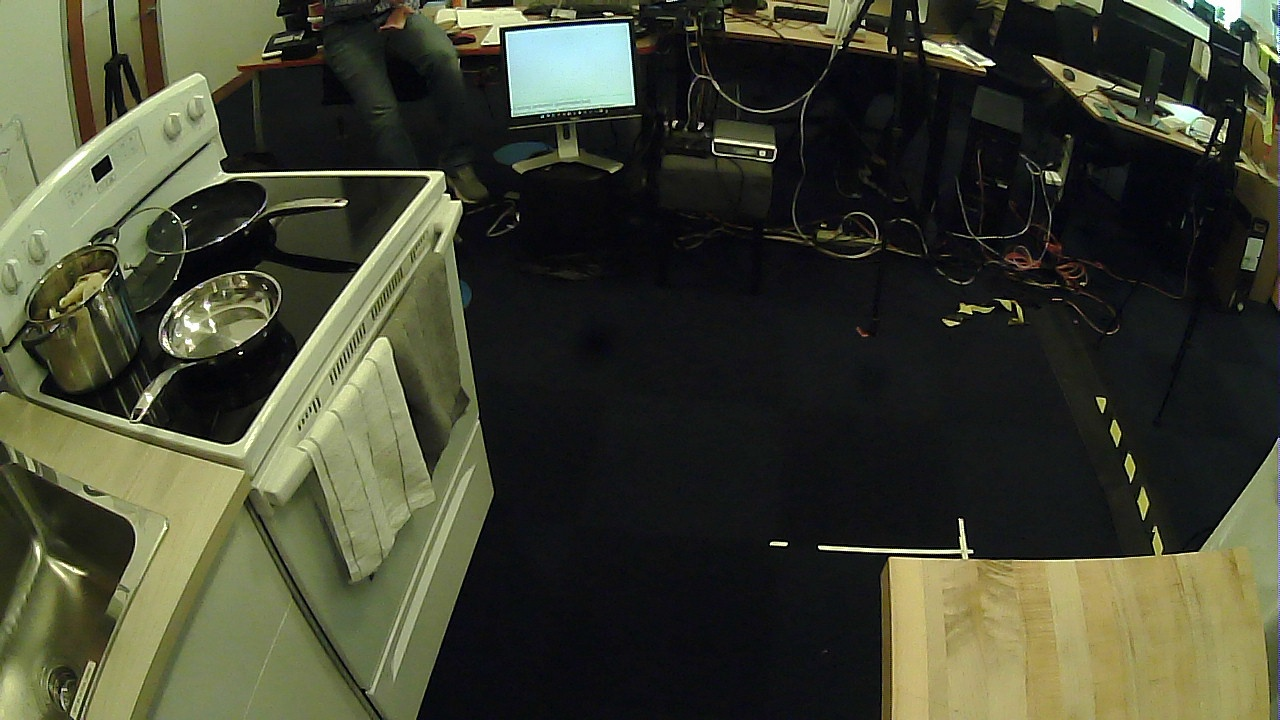

In [21]:
VIDEO_ID = "S04_01"
data_path = "actionNet"

idx = 100
record = video_list[20]
idx_untrimmed = record.start_frame + idx
tmpl =  args.dataset["RGB"].tmpl
try:
    img = Image.open(os.path.join(data_path, record.untrimmed_video_name,tmpl.format(idx_untrimmed))) \
        .convert('RGB')
except FileNotFoundError:
    print("Img not found")
    max_idx_video = int(sorted(glob.glob(os.path.join(data_path,
                                                        record.untrimmed_video_name,
                                                        "img_*")))[-1].split("_")[-1].split(".")[0])
    if idx_untrimmed > max_idx_video:
        img = Image.open(os.path.join(data_path, record.untrimmed_video_name, tmpl.format(max_idx_video))) \
            .convert('RGB')
    else:
        raise FileNotFoundError
img